<a href="https://colab.research.google.com/github/ChristopherHamian/Coursera_Capstone/blob/master/Company_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CREDIT FOR ALL DATA AND INFORMATION GATHERED FOR THIS ANALYSIS TO INDEED.COM

In [4]:
# THE OBJECTIVE OF THIS NOTEBOOK IS TO DEVELOP AN ACCURATE MACHINE LEARNING MODEL TO 
# CORRECTLY IDENTIFY THE SENTIMENT OF A USER'S REVIEW OF SECURITAS
# I'VE CHOSEN SECURITAS BECAUSE THERE IS A DECENT DISTRIUTION OF NEGATIVE AND POSITIVE REVIEWS

# THIS BEGINS BY WEB SCRAPING ALL OF THE NECESSARY DATA FROM INDEED, THAT INCLUDES
# EVERY REVIEW OF A COMPANY(REVIEW TITLE, REVIEW RATING, AND REVIEW SUMMARY)

# THEN ONCE WE'VE PREPROCESSED THAT DATA, WE CAN USE THAT DATA TO TRAIN OUR MODEL 
# TO CORRECTLY CLASSIFY THE REVIEW SENTIMENT

# NECESSARY IMPORTS FOR OUR API REQUESTS AND BEAUTIFULSOUP
from bs4 import BeautifulSoup as bs
import requests
import time
import pandas as pd
import openpyxl
from time import sleep
from random import randint
import numpy as np

In [5]:
# DECLARE THE ARRAYS THAT WILL STORE THE REVIEW CONTENT
# PAGES IS USED TO PARSE THROUGH EVERY CONTINUOUS PAGE FOR A COMPANY
MAX_REVIEWS = 10000
REVIEWS_PER_PAGE = 20
review_titles = []
review_ratings = []
review_contents = []
pages = np.arange(1, MAX_REVIEWS, REVIEWS_PER_PAGE)
COMPANY = 'Securitas'
URL = "https://www.indeed.com/cmp/"+COMPANY+"/reviews?start="

In [6]:
# DATA EXTRACTION

for page in pages: 
  
  page = requests.get(URL + str(page)) # REQUESTS THE NEXT PAGE BY INCREASING THE REVIEW NUMBER IN THE URL
  soup = bs(page.content, 'html.parser')

  review_container = soup.find_all('div', class_='cmp-Review') # CONTAINER OBJECT FOR ALL THE REVIEWS 

  # LOOPS THROUGH ALL THE REVIEWS ON THE CURRENT PAGE
  for container in review_container:

    # EXTRACTS THE TITLE OF THE CURRENT REVIEW
    title = container.find('div',class_='cmp-Review-title')
    review_titles.append(title.get_text())

    # EXTRACTS THE RATING OF THE CURRENT REVIEW
    rating = container.find('div',class_='cmp-ReviewRating-text')
    review_ratings.append(rating.get_text())

    # EXTRACTS THE CONTENT OF THE CURRENT REVIEW
    content = container.find('div',class_='cmp-Review-text')
    review_contents.append(content.get_text())

  sleep(randint(2,8))

print("Scraping Completed")

Scraping Completed


In [7]:
dataset_length = len(review_titles)
print("Total Reviews in our Dataset:", dataset_length)

Total Reviews in our Dataset: 10500


In [8]:
# DATA CLEANING
print("Before Cleaning Data:")
print(review_contents[0])
print("------------------------------------------------")
review_contents[:] = [reviews.lstrip('\n') for reviews in review_contents]
review_contents[:] = [reviews.rstrip('\n') for reviews in review_contents]
review_contents[:] = [reviews.lower() for reviews in review_contents]
print("After Cleaning Data:")
print(review_contents[0])

Before Cleaning Data:
 Shift's: 8,10,12,14hr
------------------------------------------------
After Cleaning Data:
 shift's: 8,10,12,14hr


In [9]:
# INSTANTIATE DATAFRAME TO STORE OUR DATA
df = pd.DataFrame()
df['Review Title']=review_titles
df['Summary']=review_contents
df['Rating']=review_ratings
df.head()

,Review Title,Summary,Rating
0,My review over Securitas,a typical work day included relieving fellow o...,5.0
1,Lack of communication,it's ok if you like to patrol on foot/mobile a...,4.0
2,Nothing really.,nothing. the company relies too much on the br...,3.0
3,Laid back and felt very important at this job,1. i felt wanted and recognized with this job....,4.0
4,Production great opportunity to progress,great work place located at keiser permanente....,5.0


In [10]:
# WE'RE GOING TO ADD OUR LABELS TO EACH REVIEW
# WE'LL USE THE SENTIMENT.POLARITY FUNCTION TO DETERMINE IF A REVIEW IS MORE POSITIVE OR NEGATIVE

from textblob import TextBlob
sentiment = []
label = []
for row in df['Summary']:
  sent = TextBlob(row).sentiment.polarity
  if sent>0:
    label.append(1) # POSITIVE REVIEWS WILL BE LABELED WITH 1
    sentiment.append('Positive')
  else:
    label.append(0) # NEGATIVE REVIEWS WILL BE LABELED WITH 0
    sentiment.append('Negative')

# ADD SENTIMENTS AND LABELS TO DATAFRAME
df['Sentiment'] = sentiment
df['Label'] = label
df.head()

,Review Title,Summary,Rating,Sentiment,Label
0,My review over Securitas,a typical work day included relieving fellow o...,5.0,Positive,1
1,Lack of communication,it's ok if you like to patrol on foot/mobile a...,4.0,Positive,1
2,Nothing really.,nothing. the company relies too much on the br...,3.0,Positive,1
3,Laid back and felt very important at this job,1. i felt wanted and recognized with this job....,4.0,Positive,1
4,Production great opportunity to progress,great work place located at keiser permanente....,5.0,Positive,1


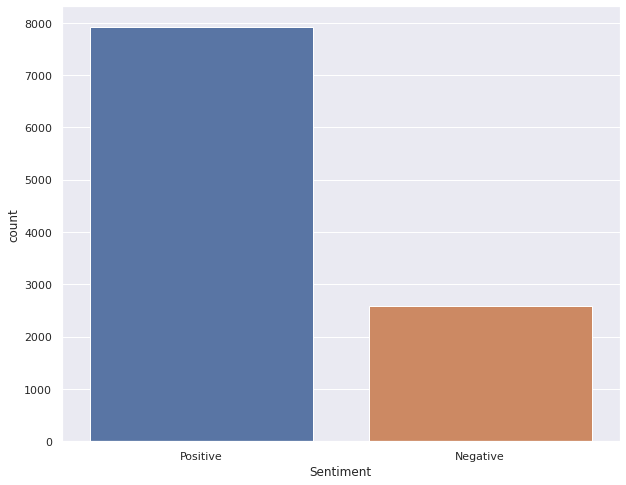

In [12]:
# EXPLORING THE DATA (EDA)

# PLOT THE TOTAL COUNT OF REVIEWS BY SENTIMENT TO ANALYZE THE DISTRIBUTION OF THE SENTIMENTS
# FROM THE GRAPH, WE CAN SEE THAT THERE ARE FAR MORE POSITIVE REVIEWS THAN NEGATIVE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Sentiment", data=df)

In [13]:
# CONFIRM THE ASSUMPTION BY PRINTING THE EXACT NUMBERS OF POSITIVE AND NEGATIVE REVIEWS
df.groupby(['Sentiment']).count()

,Review Title,Summary,Rating,Label
Sentiment,,,,
Negative,2584,2584,2584,2584
Positive,7916,7916,7916,7916


In [14]:
# WE'LL VISUALIZE THE TWO SENTIMENTS BY LOOKING AT WORDCLOUDS OF POSITIVE AND NEGATIVE REVIEWS
# WORDCLOUDS REPRESENT THE FREQUENCY OF WORDS IN A DATASET 

# ISOLATE THE POSITIVE AND NEGATIVE REVIEWS
positive_reviews = df[df["Label"]==1]
negative_reviews = df[df["Label"]==0]

positive_reviews_list = positive_reviews["Summary"].values.tolist()
negative_reviews_list = negative_reviews["Summary"].values.tolist()


from wordcloud import WordCloud, STOPWORDS

# WE WANT TO REMOVE ANY STOPWORDS FROM EACH REVIEW
stopwords = set(STOPWORDS)   

Wordcloud for Positive Reviews


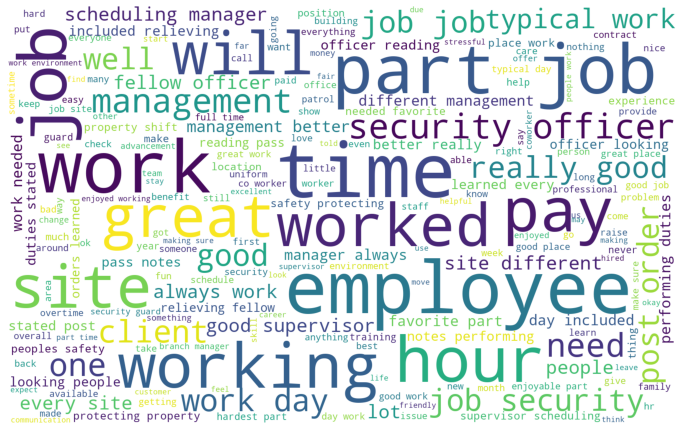

In [82]:
# GENERATE WORDCLOUD FROM ALL OF THE POSITIVE REVIEWS
positive_reviews_string = "".join(positive_reviews_list)
positive_reviews_string = positive_reviews_string.replace("securitas", "")
positive_reviews_string = positive_reviews_string.replace("company", "")

wordcloud = WordCloud(width=1600, height=1000,max_font_size=180,background_color ='white', 
stopwords = stopwords).generate(positive_reviews_string)
print("Wordcloud for Positive Reviews")
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()  

Wordcloud for Negative Reviews


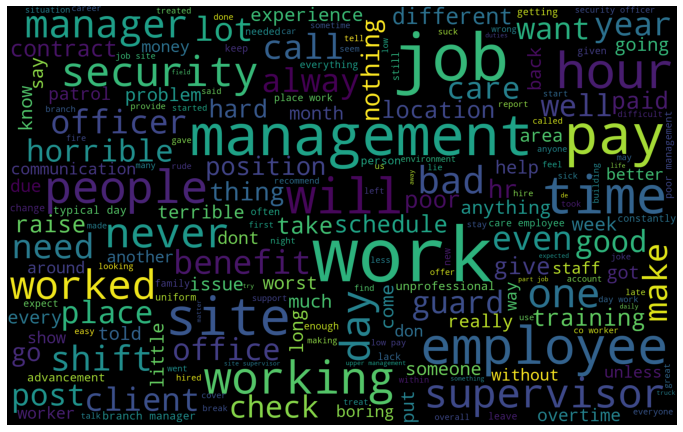

In [83]:
# GENERATE WORDCLOUD FROM ALL OF THE NEGATIVE REVIEWS
negative_reviews_string = "".join(negative_reviews_list)
negative_reviews_string = negative_reviews_string.replace("securitas", "")
negative_reviews_string = negative_reviews_string.replace("company", "")
print("Wordcloud for Negative Reviews")
wordcloud = WordCloud(width=1600, height=1000,max_font_size=180,background_color ='black', 
stopwords = stopwords).generate(negative_reviews_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()  

In [17]:
# PREPARE DATESET FOR MODELING

# DIVIDE DATASET INTO X(INPUTS) AND Y(OUTPUTS)
# X DATASET WILL COMPRISE OF THE REVIEW SUMMARIES
# Y DATASET WILL COMPRISE OF THE REVIEW SENTIMENT

X = df['Summary'].values
y = df['Label'].values

In [18]:
# DECLARE CONSTANTS FOR THE MODEL

vocab_size = 2000 # MAXIMUM NUMBER OF KEY WORDS TO ANALYZE IN DATASET
embedding_dim = 16 # DIMENSION OF OUR EMBEDDING SAMPLE SIZES
maxlen = 100 # MAX NUMBER OF WORDS IN A REVIEW (FOR PADDING)
dataset_split = int(dataset_length*0.8) # 80% OF THE DATASET WILL BE USED FOR TRAINING AND 20% WILL BE USED FOR TESTING
epochs = 10 # NUMBER OF TIMES THAT THE MODEL WILL ITERATE THROUGH THE NETWORK

In [19]:
# DIVIDE X AND Y INTO X_TRAIN, X_TEST, Y_TRAIN, Y_TEST

X_train = X[0:dataset_split]
y_train = y[0:dataset_split]
X_test = X[dataset_split:]
y_test = y[dataset_split:]
print("Total Values in Training Set:", len(X_train))
print('-----------------------------------')
print("Total Values in Testing Set:", len(X_test))

Total Values in Training Set: 8400
-----------------------------------
Total Values in Testing Set: 2100


In [81]:
# BEGIN TOKENIZING REVIEW CONTENTS
# TOKENIZING THE DATA IS THE PROCESS OF BREAKING DOWN BIG TEXT INTO SMALLER TEXTS
# ONCE BROKEN DOWN, EACH WORD WILL BE ASSIGNED A WORD INDEX

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print("Sample Word Index:")
print(list(word_index.keys())[10], list(word_index.values())[10])

Sample Word Index:
work 11


In [21]:
# CONVERTS TEXT SEQUENCES TO NUMBER(TOKEN) SEQUENCES

X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)

print("Text Sequence of Sample Review:")
print(X_train[0])
print('--------------------------------------------------')
print("Tokenized Sequence of Sample Review:")
print(X_train_sequence[0])

Text Sequence of Sample Review:
 shift's: 8,10,12,14hr
--------------------------------------------------
Tokenized Sequence of Sample Review:
[5, 97, 11, 52, 158, 164, 155, 62, 167, 152, 103, 163, 162, 121, 28, 160, 15, 2, 79, 153, 34, 6, 88, 86, 37, 9, 70, 34, 26, 84, 17, 20, 78, 80, 6, 45, 5, 71, 27, 72, 4, 125, 69, 47, 65, 11, 14, 61, 6, 92, 34, 21, 159, 64, 10, 2, 16, 9, 2, 16, 139, 6, 9, 5, 31, 62, 100, 53, 8, 161, 127, 4, 2, 165, 2, 131, 34, 171, 117, 124, 115, 172]


In [22]:
# IMPLEMENT PADDING TO THE REVIEWS
# PADDING ENSURES THAT ALL REVIEWS ARE OF THE SAME LENGTH WHICH WILL HELP THE MODEL INTERPRET EACH REVIEW

from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train_sequence, maxlen=maxlen, padding='post',truncating='post')
X_test_pad = pad_sequences(X_test_sequence, maxlen=maxlen, padding='post',truncating='post')
X_train_pad = np.array(X_train_pad)
X_test_pad = np.array(X_test_pad)

print("Sequence before Padding:")
print(X_train_sequence[0])
print("---------------------------------------------------")
print("Sequence after Padding:")
print(X_train_pad[0])

Sequence before Padding:
[5, 97, 11, 52, 158, 164, 155, 62, 167, 152, 103, 163, 162, 121, 28, 160, 15, 2, 79, 153, 34, 6, 88, 86, 37, 9, 70, 34, 26, 84, 17, 20, 78, 80, 6, 45, 5, 71, 27, 72, 4, 125, 69, 47, 65, 11, 14, 61, 6, 92, 34, 21, 159, 64, 10, 2, 16, 9, 2, 16, 139, 6, 9, 5, 31, 62, 100, 53, 8, 161, 127, 4, 2, 165, 2, 131, 34, 171, 117, 124, 115, 172]
---------------------------------------------------
Sequence after Padding:
[  5  97  11  52 158 164 155  62 167 152 103 163 162 121  28 160  15   2
  79 153  34   6  88  86  37   9  70  34  26  84  17  20  78  80   6  45
   5  71  27  72   4 125  69  47  65  11  14  61   6  92  34  21 159  64
  10   2  16   9   2  16 139   6   9   5  31  62 100  53   8 161 127   4
   2 165   2 131  34 171 117 124 115 172   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [23]:
# IMPORTS FOR OUR KERAS MODEL

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
# INSTANTIATE THE MODEL AND ADD APPROPRIATE LAYERS
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=maxlen),
                             tf.keras.layers.Conv1D(128, 5, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [60]:
# COMPILE MODEL BY IDENTIFYING THE DESIRED LOSS FUNCTION AND OPTIMIZER
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(0.001),metrics=['accuracy'])

In [61]:
# EXAMINE HOW THE DATASET PASSES THROUGH EACH LAYER OF THE NETWORK
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           32000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           10368     
_________________________________________________________________
dropout_4 (Dropout)          (None, 96, 128)           0         
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [62]:
# TRAIN MODEL FOR 10 EPOCHS AND THE VALIDATION DATA WILL BE THE TESTING SET
history = model.fit(
    X_train_pad,
    y_train,
    epochs=epochs,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
210/210 - 3s - loss: 0.5418 - accuracy: 0.7405 - val_loss: 0.4093 - val_accuracy: 0.8125
Epoch 2/10
210/210 - 3s - loss: 0.3460 - accuracy: 0.8469 - val_loss: 0.3143 - val_accuracy: 0.8649
Epoch 3/10
210/210 - 2s - loss: 0.2471 - accuracy: 0.9024 - val_loss: 0.3120 - val_accuracy: 0.8619
Epoch 4/10
210/210 - 3s - loss: 0.1997 - accuracy: 0.9202 - val_loss: 0.3015 - val_accuracy: 0.8726
Epoch 5/10
210/210 - 3s - loss: 0.1621 - accuracy: 0.9374 - val_loss: 0.3300 - val_accuracy: 0.8625
Epoch 6/10
210/210 - 3s - loss: 0.1433 - accuracy: 0.9485 - val_loss: 0.3401 - val_accuracy: 0.8637
Epoch 7/10
210/210 - 3s - loss: 0.1203 - accuracy: 0.9601 - val_loss: 0.3603 - val_accuracy: 0.8732
Epoch 8/10
210/210 - 3s - loss: 0.1033 - accuracy: 0.9692 - val_loss: 0.3860 - val_accuracy: 0.8750
Epoch 9/10
210/210 - 3s - loss: 0.0881 - accuracy: 0.9720 - val_loss: 0.4278 - val_accuracy: 0.8702
Epoch 10/10
210/210 - 3s - loss: 0.0740 - accuracy: 0.9802 - val_loss: 0.4843 - val_accuracy: 0.8607

#### 98% accuracy on Training Set and 86% accuracy on Validation Set

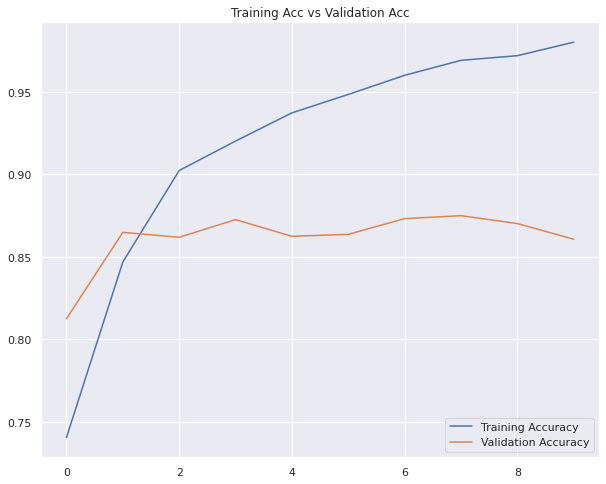

In [63]:
# VISUALIZE TRAINING RESULTS

# PLOT THE ACCURACY OF THE TRAINING SET VS VALIDATION SET
# ARRAYS OF ACCURACY MEASURES PER EPOCH
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,8))
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training Acc vs Validation Acc')
plt.show()

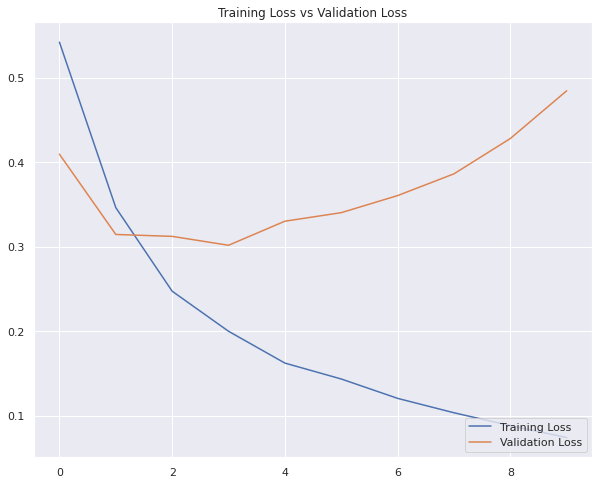

In [64]:
# PLOT THE AVERAGE LOSS OF THE TRAINING SET VS THE VALIDATION SET
# ARRAYS OF LOSSES PER EPOCH
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,8))
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training Loss vs Validation Loss')
plt.show()

In [65]:
# EVALUATE THE MODEL ON THE TESTING DATASET
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print("Loss from Testing Set:", test_loss)
print('--------------------------------------')
print("Accuracy from Testing Set", test_acc)

66/66 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.8686
Loss from Testing Set: 0.5244457721710205
--------------------------------------
Accuracy from Testing Set 0.868571400642395


### 86% accuracy on Testing Set is pretty good

In [66]:
# ONCE WE'RE HAPPY WITH OUR MODEL, WE CAN PREDICT THE SENTIMENT OF CUSTOM REVIEWS

# FUNCTION TO PREDICT THE SENTIMENT OF A REVIEW USING OUR TRAINED MODEL
def predict_sent(review):
  review_seq = tokenizer.texts_to_sequences(review)
  review_pad = pad_sequences(review_seq, maxlen=maxlen, padding='post', truncating="post")
  prediction = model.predict(review_pad)
  print(prediction)
  # IF THE PREDICTED VALUE IS CLOSER TO 1(GREATER THAN 0.5) THEN THE REVIEW IS POSITIVE
  # IF THE PREDICTED VALUE IS CLOSER TO 0(LESS THAN 0.5) THEN THE REVIEW IS NEGATIVE

  if float(prediction)>0.5:
    print("Positive")
  else:
    print("Negative")

In [67]:
review = ["This place is the best place to work. The people are awesome."]
predict_sent(review)

[[0.99999845]]
Positive


In [68]:
review = ["This place is the worst place to work. The people are terrible."]
predict_sent(review)

[[3.0268784e-05]]
Negative


In [69]:
review = ["Great benefits and fantastic team environment,"]
predict_sent(review)

[[0.7166843]]
Positive


In [70]:
review = X_test[1:2] # FROM TESTING SET
print(review)
predict_sent(review)

['a day game is the best day at the yankee stadium. as a security officer you hope to go through a line of guest bacgs without having to confiscate items from their bags. i learned to be alert and command at times towards your co workers.']
[[0.5710224]]
Positive


In [74]:
review = X_test[20:21] # FROM TESTING SET
print(review)
predict_sent(review)

['not stable\rconstantly getting moved around to different sites\rpoor management / communication\rpay is poor\r basically go anywhere else if given the opportunity']
[[0.02567764]]
Negative


## Ways we can Improve the model:
- adding more negative reviews to balance out the distribution ratio of positive to negative reviews
- using a dataset with more confirmed labels beforehand because TextBlob could've incorrectly classified some of the ratings